# Include S6, S7, H1, H2, and OBJ into the GP model

25-Apr-21 update: keep objective lens at fixed value, remove it from the input parameter of GP


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pickle
import numpy as np
from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
from modules.OnlineGP import OGP
import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
sys.path.insert(1, '/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/GPTrelated')
saveResultsQ = False
import scipy
import tensorflow as tf
from CorrectDefocus import CorrectDefocus

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
os.environ["CUDA_VISIBLE_DEVICES"]="0" # specify which GPU to use
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [36]:
# free space from GPU device
from numba import cuda
cuda.select_device(0)
cuda.close()

### Creat the machine interface

In [14]:
ndim = 6 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, dH, S6, S7, Obj, S3, S4

x_low = np.asarray([1000, -20, 387000, -655000, 119000, 640000])
x_high = np.asarray([2200, 20, 391000, -635000, 120300, 651000])

# create random starting point or define a fixed starting point
rs = np.random.RandomState()
start_point = [x_low[i] + (rs.rand()*(x_high[i]-x_low[i])) for i in range(6)]
S2 = rs.rand()
start_point = [(start_point - x_low)/(x_high - x_low)]

# Manually find C3 corrected state
# start_point = [[ 1498.216, 1498.694 - 1498.246, 390000, -654100, -3.7503e6-220,119931.5, 648691.415]]
print(start_point)

#creat machine interface with path of the CNN model
model_path = 'CNNmodels/VGG16_smallDefocus.h5'
mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, 
                                 CNNoption=1, CNNpath = model_path, DefocusOption = 1, S2 = 1) 

[array([0.72313444, 0.34897763, 0.11804126, 0.31593166, 0.96360316,
       0.97927044])]
Model loaded
Model loaded


In [15]:
new_S2 = CorrectDefocus(mi.x, mi.S2)

Model loaded
250000.0
Predicting defocus...
saving ronchigram...
Supposed to be grabbing initial machine state...
250000.0
Predicting defocus...
saving ronchigram...
x_init [[1]]
y_init [[0.92963175]]


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


248895.97850876473
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


247258.38829761164
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


250770.89759041314
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


249659.82902492993
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


248878.78294050772
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


249076.1986251626
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


249071.44183166244
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


249172.21074520407
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


248719.79523160218
Predicting defocus...
saving ronchigram...


/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq
/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/OnlineGP.py:464: RuntimeWarning: invalid value encountered in add
  K = K + x1_sum_sq + x2_sum_sq


248610.2820599163
Predicting defocus...
saving ronchigram...


In [16]:
print(new_S2)
mi.setS2(new_S2[0][0])

(array([0.78663254]), array([[0.97398475]]))


[[0.72313444 0.34897763 0.11804126 0.31593166 0.96360316 0.97927044]]
Using CNN prediction.
saving ronchigram...
[0.79238005]
Estimating defocus...
0.9739847518503666


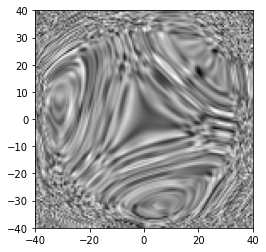

In [17]:
print(mi.x)
#check the reading objective and reading defocus are working
temp = mi.getState()
print(temp[1][0])
temp = np.load('ronchigram.npy')
plt.imshow(temp, extent = [-40, 40, -40, 40], cmap='gray')
print(mi.getDefocus())

### Create the gp

In [18]:
# hyperparameters determined using GPy for emittance from CNN

#TFGP
gp_ls = np.array(np.ones(ndim)) * [0.7187, 0.06711, 0.3495, 0.3427,0.1253, 0.1312] 
gp_amp = 0.256
gp_noise = 0.000253

# GPy
# gp_ls = np.array(np.ones(ndim)) * [0.369, 0.052, 0.206, 0.284, 0.168, 0.110, 0.063] 
# gp_amp = 0.059
# gp_noise = 4e-8

gp_precisionmat =  np.array(np.diag(1/(gp_ls**2)))
ndim = len(dev_ids)
hyperparams = {'precisionMatrix': gp_precisionmat, 'amplitude_covar': gp_amp, 'noise_variance': gp_noise} 
gp = OGP(ndim, hyperparams)

In [19]:
gp_ls

array([0.7187 , 0.06711, 0.3495 , 0.3427 , 0.1253 , 0.1312 ])

### Create the BO

In [20]:
#create the bayesian optimizer that will use the gp as the model to optimize the machine 
opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids)
opt.ucb_params = np.array([0.002, 0.4])
opt.ucb_params = np.array([2, None])
# opt.ucb_params = np.array([1, 1])
# opt.bounds = [(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1)]

Supposed to be grabbing initial machine state...
Using CNN prediction.
saving ronchigram...
x_init [[0.72313444 0.34897763 0.11804126 0.31593166 0.96360316 0.97927044]]
y_init [[0.79238005]]


**Running BO**

*run the gp search for some number of steps*

In [21]:
Obj_state_s=[]
Obj_state_s.append(mi.getState()[1][0])

Using CNN prediction.
saving ronchigram...


In [22]:
def GPT_emit():
    ASCIIFILE = '/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/outscope.txt'
    screen =  np.loadtxt(ASCIIFILE, skiprows=5)
            
    x  = screen[:,0]
    y  = screen[:,1]
    x = x * 1e12
    y = y * 1e12  # x and y in unit of pm

    ax = np.divide(screen[:,4], screen[:,6])
    ay = np.divide(screen[:,5], screen[:,6])
    arx = np.sqrt(ax**2 + ay**2)
    index = np.where(arx < 0.04)

    x = x[index]
    y = y[index]
    ax = ax[index]
    ay = ay[index]

    # directly calculate emittance from defination for all the simulated electrons
    emit_1 = np.average(x**2 + y**2)
    emit_2 = np.average(ax**2 + ay**2)
    emit_3 = np.average(x*ax + y*ay)
    emit = np.sqrt(emit_1 * emit_2 - emit_3**2) # emittance in unit of [pm*rad]
    
    return -emit

<Figure size 288x288 with 0 Axes>

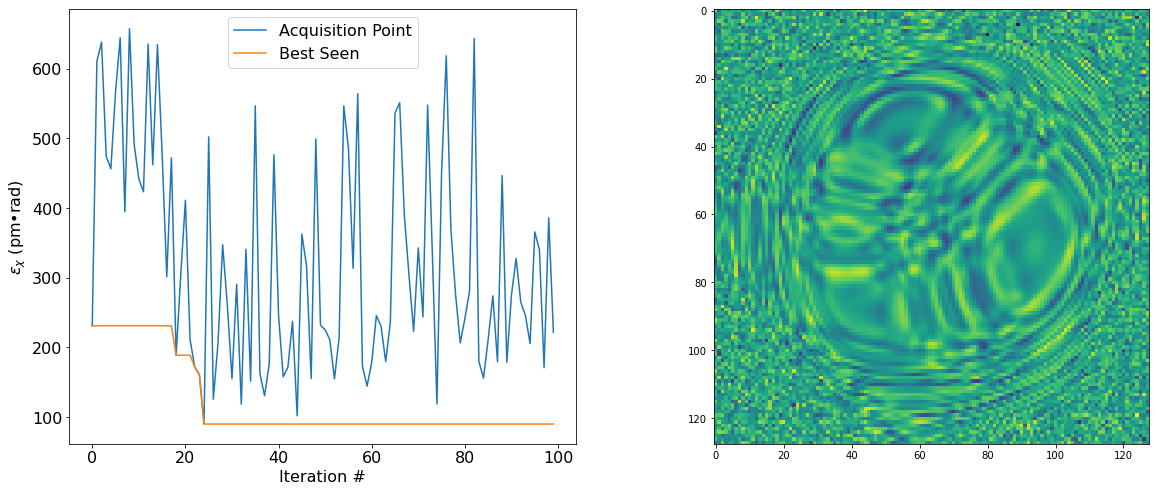

/home/chenyu/Desktop/Bayesian-optimization-using-Gaussian-Process/modules/parallelstuff.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res)
/home/chenyu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/chenyu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Using CNN prediction.
saving ronchigram...
Estimating defocus...
0.12002670764923096 [ 9.19173732e-01  3.37658703e-01 -1.08810306e+02  8.87166317e-02
  3.46522544e-01  1.36868401e+00  4.51855230e-01  6.29017658e-01
  9.62238748e-01]
(array([0.50960748, 0.27240463, 0.85760135, 0.21903933, 0.73735928,
       0.86357211]), array([[0.91917373]]))


In [23]:
# Test over single starting point
Niter = 100
Status_array = np.zeros([Niter + 1, 9]) # save the
Status_array[0,0] = Status_array[0,1] = mi.getState()[1][0]
Status_array[0,2] = GPT_emit()

Status_array[0,3] = opt.current_x[0][0]
Status_array[0,4] = opt.current_x[0][1]
Status_array[0,5] = opt.current_x[0][2]
Status_array[0,6] = opt.current_x[0][3]
Status_array[0,7] = opt.current_x[0][4]
Status_array[0,8] = opt.current_x[0][5]
# Status_array[0,9] = opt.current_x[0][6]

Defocus_array = np.zeros(Niter + 1)
Defocus_array[0] = mi.getDefocus()
Ronch_array = []

for i in range(Niter):
    
    print ('iteration =', i)
    fig = plt.figure(figsize=(4,4))
    temp = np.load('ronchigram.npy')
    Ronch_array.append(temp)
    
    clear_output(wait=True)

    fig = plt.figure(figsize=[20,8])
    plt.subplot(121)

    plt.plot((1-Status_array[0:-1,1])*1112.7,'-',c='C0', label = 'Acquisition Point')
    plt.plot((1-Status_array[0:-1,0])*1112.7,c='C1', label = 'Best Seen')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.xlabel('Iteration #', fontsize = 16)
    plt.ylabel('$\epsilon_\chi$ (pm\u2022rad)', fontsize=16)

    plt.subplot(122)
    plt.imshow(temp)
    plt.show()
    

    # Start of new iteration
    temp = opt.OptIter() # save the new acquisition point and objective value
    Obj_state_s.append(opt.best_seen()[1]) # save current best value
    Status_array[i+1, 0] = opt.best_seen()[1][0][0]  # best seen objective so far
    Status_array[i+1, 1] = temp[1][0]  # objective at new point
    Status_array[i+1, 2] = GPT_emit()     # objective provided by GPT profile, as a reference
    
    Status_array[i+1, 3] = temp[0][0][0]  # coordinate of new state
    Status_array[i+1, 4] = temp[0][0][1]
    Status_array[i+1, 5] = temp[0][0][2]
    Status_array[i+1, 6] = temp[0][0][3]
    Status_array[i+1, 7] = temp[0][0][4]
    Status_array[i+1, 8] = temp[0][0][5]
#     Status_array[i+1, 9] = temp[0][0][6]
    Defocus_array[i+1] = mi.getDefocus()
    print(Defocus_array[i+1], Status_array[i+1, :])
    
    if Defocus_array[i] < 0.85:
        print('Calling GP to tune objective lens...')
        new_S2 = CorrectDefocus(temp[0], mi.S2)
        print('Corrected defocus: ' + str(new_S2[1]))
        mi.setS2(new_S2[0][0])
    
    print(opt.best_seen())

In [53]:
np.save('SmallDefocus_UCB_2-0_TFGP_Nbest3_Nstart2_100iter_01',Status_array)
np.save('SmallDefocus_UCB_2-0_TFGP_Nbest3_Nstart2_100iter_Ronchigram_01.npy',Ronch_array)

In [21]:
mi.best_seen()

AttributeError: 'machine_interface' object has no attribute 'best_seen'

Model loaded
[[ 3.60005518e+03 -3.11606145e+00  3.93835236e+05 -6.22144943e+05
   1.18919071e+05  6.48606323e+05]]


/home/chenyu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/chenyu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Using CNN prediction.
saving ronchigram...
(array([[ 2.16671265,  0.42209846,  1.70880898,  1.64275286, -0.06225271,
         0.78239296]]), array([[0.40831244]]))


Text(0, 0.5, '$y^\\prime \\ \\mathrm{(mrad)}$')

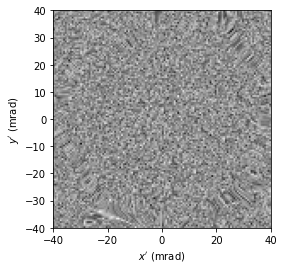

In [20]:
start_point = [opt.best_seen()[0]]
x_low = np.asarray([ 1000, -20,  387000, -655000, 119000, 640000])
x_high = np.asarray([ 2200, 20,  391000, -635000, 120300, 651000])

mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, 
                                 CNNoption=1, CNNpath = model_path) 
print(mi.x * (x_high - x_low) + x_low)

print(mi.getState())
temp = np.load('ronchigram.npy')
plt.imshow(temp,extent=[-40,40,-40,40],cmap='gray')
# plt.axis('off')
plt.xlabel(r"$x^\prime \ \mathrm{(mrad)}$")
plt.ylabel(r"$y^\prime \ \mathrm{(mrad)}$")

In [3]:
Status_array = np.load('HP-TL-Obj_1000e_UCB_1-1_TFGP_Nbest3_Nstart2_500iter_01.npy')
Ronch_array = np.load('HP-TL-Obj_1000e_UCB_1-1_TFGP_Nbest3_Nstart2_500iter_Ronchigram_01.npy')

In [4]:
# reshape the status_array for hyperparameter training
Status_array.shape
Obj_x = Status_array[:,3:10]
Obj_y = Status_array[:,1]
np.save('Obj_x_GPrun.npy', Obj_x)
np.save('Obj_y_GPrun.npy', Obj_y)
print(Obj_x.shape)

(501, 7)


In [36]:
print(np.argmin(1-Status_array[0:100,1]))
print(Status_array[65,:])
print(Defocus_array[65])

65
[  0.88960575   0.88960575 -61.58904024   2.16671265   0.42209846
   1.70880898   1.64275286  -0.06225271   0.78239296   0.        ]
0.9750944674015045


Text(0, 0.5, '$\\epsilon_\\chi$ (pm•rad)')

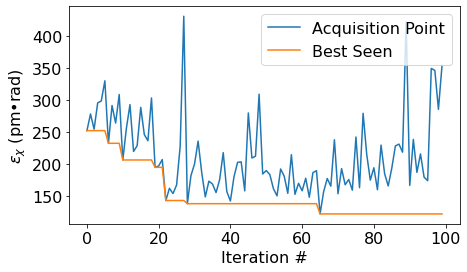

In [33]:
fig = plt.figure(figsize = (7,4))

plt.subplot(111)
plt.plot((1-Status_array[0:100,1])*1112.7,'-',c='C0', label = 'Acquisition Point')
plt.plot((1-Status_array[0:100,0])*1112.7,c='C1', label = 'Best Seen')
# plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
# plt.legend(fontsize=16, bbox_to_anchor=[0.9, 0.1],loc = 'lower right')
plt.xlabel('Iteration #', fontsize = 16)
plt.ylabel('$\epsilon_\chi$ (pm\u2022rad)', fontsize=16)
# plt.xlim([0,100])

Text(0, 0.5, '$\\epsilon_\\chi$ (pm•rad)')

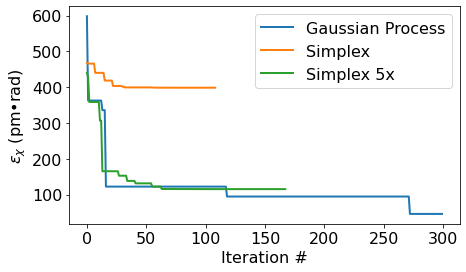

In [11]:
# compare to simplex
# simplex_100 = np.load('HP-TL-Obj_1000e_UCB_2-0_Emit_300iter_oldWhiteNoise_01_simplex_100xWiderRange.npy')
simplex_7x = np.load('HP-TL-Obj_1000e_UCB_0.002-0.4_GPy_300iter_01_simplex_7xRange.npy')
simplex_5x = np.load('HP-TL-Obj_1000e_UCB_0.002-0.4_GPy_300iter_01_simplex_5xRange.npy')
simplex = np.load('HP-TL-Obj_1000e_UCB_0.002-0.4_GPy_300iter_01_simplex_standardRange.npy')

fig = plt.figure(figsize = (7,4))

plt.subplot(111)
# plt.plot(-Status_array[0:-1,1]*1112.7,'.',c='C0', label = 'GP Acquisition Point')
plt.plot(-Status_array[0:-1,0]*1112.7, linewidth = 2, c='C0', label = 'Gaussian Process')
plt.plot(-simplex[0:-1,7]*1112.7, linewidth = 2,c='C1', label = 'Simplex')
plt.plot(-simplex_5x[0:-1,7]*1112.7, linewidth = 2,c='C2', label = 'Simplex 5x')
# plt.plot(-simplex_7x[0:-1,7]*1112.7, linewidth = 2,c='C3', label = 'Simplex 7x')
# plt.plot(-simplex_140[0:-1,7]*1112.7, linewidth = 2,c='C4', label = 'Simplex 140x')

# plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
# plt.legend(fontsize=16, bbox_to_anchor=[0.9, 0.1],loc = 'lower right')
plt.xlabel('Iteration #', fontsize = 16)
plt.ylabel('$\epsilon_\chi$ (pm\u2022rad)', fontsize=16)
# plt.xlim([0,100])

Text(0, 0.5, '$\\epsilon_\\chi$ (pm•rad)')

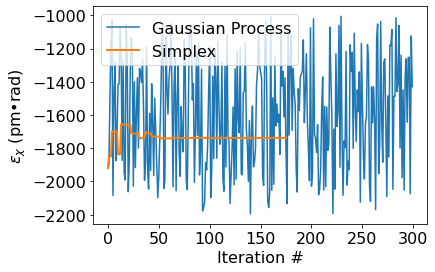

In [37]:
# Compare the parameter scan in GP and simplex
plt.subplot(111)
plt.plot(-Status_array[0:-1,3],'-',c='C0', label = 'Gaussian Process')
plt.plot(-Status_array_simplex[0:-1,0], linewidth = 2,c='C1', label = 'Simplex')
# plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
# plt.legend(fontsize=16, bbox_to_anchor=[0.9, 0.1],loc = 'lower right')
plt.xlabel('Iteration #', fontsize = 16)
plt.ylabel('$\epsilon_\chi$ (pm\u2022rad)', fontsize=16)
# plt.xlim([0,100])

Text(0, 0.5, 'HP 1')

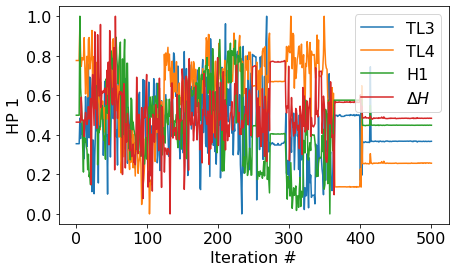

In [7]:
fig = plt.figure(figsize = (7,4))

plt.subplot(111)
plt.plot((Status_array[:,5] - np.amin(Status_array[0:-1,5]))/(np.amax(Status_array[0:-1,5])-np.amin(Status_array[0:-1,5])),c='C0', label = 'TL3')
plt.plot((Status_array[:,6] - np.amin(Status_array[0:-1,6]))/(np.amax(Status_array[0:-1,6])-np.amin(Status_array[0:-1,6])),c='C1', label = 'TL4')
plt.plot((Status_array[:,4] - np.amin(Status_array[0:-1,4]))/(np.amax(Status_array[0:-1,4])-np.amin(Status_array[0:-1,4])),c='C2', label = 'H1')
plt.plot((Status_array[:,3] - np.amin(Status_array[0:-1,3]))/(np.amax(Status_array[0:-1,3])-np.amin(Status_array[0:-1,3])),c='C3', label = '$\Delta H$')

# plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
# plt.legend(fontsize=16, bbox_to_anchor=[0.9, 0.1],loc = 'lower right')
plt.xlabel('Iteration #', fontsize = 16)
plt.ylabel('HP 1', fontsize=16)
# plt.xlim([0,100])

## Test different random starting points